In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    #plt.show()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [15]:
# input image dimensions
print( K.image_data_format())
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

channels_last


In [16]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
batch_size = 128
num_classes = 10
epochs = 20

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 3 Layer Architecture with kernel size 3 * 3

We try 3 layer convolution with kernel size of 3*3 and also batchnorm and max pooling.

In [0]:
model_3layer=Sequential()
## Convolution 1st layer
model_3layer.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model_3layer.add(Conv2D(64, (3, 3), activation='relu'))
model_3layer.add(BatchNormalization())

## Convolution 2nd layer
model_3layer.add(Conv2D(64, (3, 3), activation='relu'))
model_3layer.add(BatchNormalization())
model_3layer.add(MaxPooling2D(pool_size=(2, 2)))

## Convolution 3rd layer
model_3layer.add(Conv2D(128, (3, 3), activation='relu'))
model_3layer.add(BatchNormalization())
model_3layer.add(MaxPooling2D(pool_size=(2, 2)))

## Flatten 
model_3layer.add(Flatten())
model_3layer.add(Dense(128, activation='relu'))

## Output layer
model_3layer.add(Dense(num_classes, activation='softmax'))

## Model compile
model_3layer.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
## Model fit
history=model_3layer.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_3layer.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.1501 - acc: 0.9557 - val_loss: 1.8583 - val_acc: 0.6187
Epoch 2/20
60000/60000 [==============================] - 19s 325us/step - loss: 0.0454 - acc: 0.9866 - val_loss: 0.3264 - val_acc: 0.9080
Epoch 3/20
60000/60000 [==============================] - 19s 325us/step - loss: 0.0293 - acc: 0.9912 - val_loss: 0.3941 - val_acc: 0.8848
Epoch 4/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.0174 - acc: 0.9947 - val_loss: 0.0485 - val_acc: 0.9853
Epoch 5/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.0120 - acc: 0.9964 - val_loss: 0.1063 - val_acc: 0.9728
Epoch 6/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.0069 - acc: 0.9978 - val_loss: 0.0790 - val_acc: 0.9783
Epoch 7/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.0047 - acc: 0.9984 - val_loss: 0.

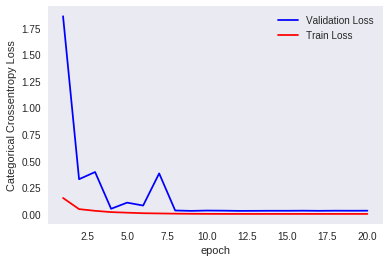

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

We see our train and validation loss is very close to each other. Thus, our model doesn't overfit and we see better accuracy with convolution layer than what we saw using MLP architecture.

# 5 Layer Architecture with kernel size 5*5

We try 5 layer architecture with kernel size 5*5 and with batchnorm and dropout.

In [0]:
dropout_rate=0.2
model_5layer=Sequential()
## Convolution 1st layer
model_5layer.add(Conv2D(32,kernel_size=(5,5),padding="same",activation='relu',input_shape=input_shape))
model_5layer.add(Conv2D(64, (5, 5), activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(Dropout(dropout_rate))
## Convolution 2nd layer
model_5layer.add(Conv2D(64, (5, 5),padding="same", activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(MaxPooling2D(pool_size=(2, 2)))
model_5layer.add(Dropout(dropout_rate))
## Convolution 3rd layer
model_5layer.add(Conv2D(128, (5, 5),padding="same", activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(MaxPooling2D(pool_size=(2, 2)))
model_5layer.add(Dropout(dropout_rate))
## Convolution 4th layer
model_5layer.add(Conv2D(128, (5, 5),padding="same", activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(MaxPooling2D(pool_size=(2, 2)))
model_5layer.add(Dropout(dropout_rate))
## Convolution 5th layer
model_5layer.add(Conv2D(128, (5, 5),padding="same", activation='relu'))
model_5layer.add(BatchNormalization())
model_5layer.add(MaxPooling2D(pool_size=(2, 2)))
model_5layer.add(Dropout(dropout_rate))
## Flatten 
model_5layer.add(Flatten())
model_5layer.add(Dense(128, activation='relu'))

## Output layer
model_5layer.add(Dense(num_classes, activation='softmax'))

## Model compile
model_5layer.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
## Model fit
history=model_5layer.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_5layer.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 33s 550us/step - loss: 0.1832 - acc: 0.9427 - val_loss: 0.1297 - val_acc: 0.9585
Epoch 2/20
60000/60000 [==============================] - 31s 520us/step - loss: 0.0543 - acc: 0.9836 - val_loss: 0.0409 - val_acc: 0.9881
Epoch 3/20
60000/60000 [==============================] - 31s 516us/step - loss: 0.0348 - acc: 0.9895 - val_loss: 0.0356 - val_acc: 0.9899
Epoch 4/20
60000/60000 [==============================] - 31s 514us/step - loss: 0.0252 - acc: 0.9925 - val_loss: 0.6036 - val_acc: 0.7965
Epoch 5/20
60000/60000 [==============================] - 31s 516us/step - loss: 0.0209 - acc: 0.9937 - val_loss: 0.0509 - val_acc: 0.9847
Epoch 6/20
60000/60000 [==============================] - 31s 517us/step - loss: 0.0169 - acc: 0.9947 - val_loss: 0.0279 - val_acc: 0.9929
Epoch 7/20
60000/60000 [==============================] - 31s 517us/step - loss: 0.0143 - acc: 0.9955 - val_loss: 0.

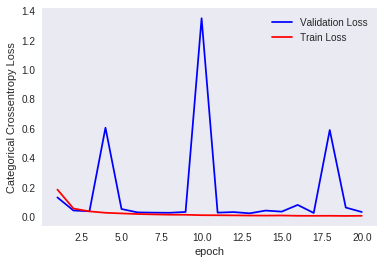

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Hmm !!... we see a strange pattern for validation loss. It is close to train loss and then peaks out and again comes back . In the end it is close to the train loss. We see decreased accuracy than the previous architecture.

# 7 Layer Architecture with Kernel size 7*7

We now try a & layer architecture with kernel size 7*7 and with dropout, batchnorm and without max pool.

In [0]:
dropout_rate=0.2
model_7layer=Sequential()
## Convolution 1st layer
model_7layer.add(Conv2D(32,kernel_size=(7,7),padding="same",activation='relu',input_shape=input_shape))
model_7layer.add(Conv2D(128, (7, 7), activation='relu'))
model_7layer.add(BatchNormalization())
model_7layer.add(Dropout(dropout_rate))
## Convolution 2nd layer
model_7layer.add(Conv2D(128, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 3rd layer
model_7layer.add(Conv2D(128, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 4th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 5th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 6th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 7th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Flatten 
model_7layer.add(Flatten())
model_7layer.add(Dense(64, activation='relu'))

## Output layer
model_7layer.add(Dense(num_classes, activation='softmax'))

## Model compile
model_7layer.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
## Model fit
history=model_7layer.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_7layer.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.5894 - acc: 0.8594 - val_loss: 1.8226 - val_acc: 0.8011
Epoch 2/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0926 - acc: 0.9769 - val_loss: 0.1009 - val_acc: 0.9797
Epoch 3/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0576 - acc: 0.9841 - val_loss: 6.6087 - val_acc: 0.2715
Epoch 4/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0455 - acc: 0.9879 - val_loss: 0.1639 - val_acc: 0.9456
Epoch 5/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0344 - acc: 0.9911 - val_loss: 0.1904 - val_acc: 0.9548
Epoch 6/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0303 - acc: 0.9914 - val_loss: 0.0990 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0243 - acc: 0.9935 - val_loss: 0.0555 - val_acc

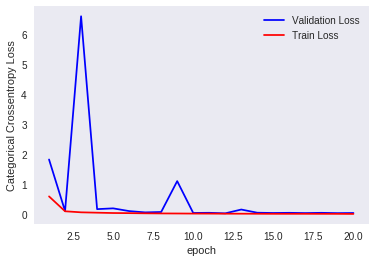

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
model_7layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 22, 22, 128)       200832    
_________________________________________________________________
batch_normalization_35 (Batc (None, 22, 22, 128)       512       
_________________________________________________________________
dropout_27 (Dropout)         (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 22, 22, 128)       802944    
_________________________________________________________________
batch_normalization_36 (Batc (None, 22, 22, 128)       512       
_________________________________________________________________
dropout_28 (Dropout)         (None, 22, 22, 128)       0         
__________

# 7 Layer architecture with kernel 7 * 7 and different dropout rates

In [17]:
dropout_rate=0.5
model_7layer=Sequential()
## Convolution 1st layer
model_7layer.add(Conv2D(32,kernel_size=(7,7),padding="same",activation='relu',input_shape=input_shape))
model_7layer.add(Conv2D(128, (7, 7), activation='relu'))
model_7layer.add(BatchNormalization())
model_7layer.add(Dropout(dropout_rate))
## Convolution 2nd layer
model_7layer.add(Conv2D(128, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 3rd layer
model_7layer.add(Conv2D(128, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 4th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 5th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 6th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 7th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Flatten 
model_7layer.add(Flatten())
model_7layer.add(Dense(64, activation='relu'))

## Output layer
model_7layer.add(Dense(num_classes, activation='softmax'))

## Model compile
model_7layer.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
## Model fit
history=model_7layer.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_7layer.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.3293 - acc: 0.9090 - val_loss: 0.6207 - val_acc: 0.9267
Epoch 2/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0829 - acc: 0.9787 - val_loss: 0.0627 - val_acc: 0.9859
Epoch 3/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0557 - acc: 0.9850 - val_loss: 0.0912 - val_acc: 0.9825
Epoch 4/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0464 - acc: 0.9877 - val_loss: 0.0522 - val_acc: 0.9851
Epoch 5/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0348 - acc: 0.9907 - val_loss: 0.0377 - val_acc: 0.9899
Epoch 6/20
60000/60000 [======

In [19]:
dropout_rate=0.8
model_7layer=Sequential()
## Convolution 1st layer
model_7layer.add(Conv2D(32,kernel_size=(7,7),padding="same",activation='relu',input_shape=input_shape))
model_7layer.add(Conv2D(128, (7, 7), activation='relu'))
model_7layer.add(BatchNormalization())
model_7layer.add(Dropout(dropout_rate))
## Convolution 2nd layer
model_7layer.add(Conv2D(128, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 3rd layer
model_7layer.add(Conv2D(128, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 4th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 5th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 6th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Convolution 7th layer
model_7layer.add(Conv2D(64, (7, 7),padding="same", activation='relu'))
model_7layer.add(BatchNormalization())
#model_7layer.add(MaxPooling2D(pool_size=(2, 2)))
model_7layer.add(Dropout(dropout_rate))
## Flatten 
model_7layer.add(Flatten())
model_7layer.add(Dense(64, activation='relu'))

## Output layer
model_7layer.add(Dense(num_classes, activation='softmax'))

## Model compile
model_7layer.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
## Model fit
history=model_7layer.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_7layer.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 94s 2ms/step - loss: 0.7259 - acc: 0.7711 - val_loss: 0.3621 - val_acc: 0.9484
Epoch 2/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1376 - acc: 0.9635 - val_loss: 0.0688 - val_acc: 0.9829
Epoch 3/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0899 - acc: 0.9761 - val_loss: 0.0717 - val_acc: 0.9850
Epoch 4/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0696 - acc: 0.9817 - val_loss: 0.0533 - val_acc: 0.9861
Epoch 5/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0609 - acc: 0.9831 - val_loss: 0.0375 - val_acc: 0.9899
Epoch 6/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0529 - acc: 0.9858 - val_loss: 0.0341 - val_acc: 0.9909
Epoch 7/20
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0463 - acc: 0.9870 - val_loss: 0.0326 - val_acc

Thus , we have seen different convolution architectures with different combinations of kernels, dropouts and maxpools. We have also seen how the train and validation loss behaves for diffrent settings. We also noticed how accuracy changes with different architectures.

###### Conclusion

In [1]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Architecture","Dropout rate","Kernel size","Test Loss","Test Accuracy"]
x.add_row(["3 Layer", "-","3*3",0.03057,0.9942])
x.add_row(["5 Layer", "0.2","5*5",0.03059,0.9919])
x.add_row(["7 Layer", "0.2","7*7",0.03501,0.9933])
x.add_row(["7 Layer", "0.5","7*7",0.03060,0.9924])
x.add_row(["7 Layer", "0.8","7*7",0.02699,0.9933])
print(x)

+--------------+--------------+-------------+-----------+---------------+
| Architecture | Dropout rate | Kernel size | Test Loss | Test Accuracy |
+--------------+--------------+-------------+-----------+---------------+
|   3 Layer    |      -       |     3*3     |  0.03057  |     0.9942    |
|   5 Layer    |     0.2      |     5*5     |  0.03059  |     0.9919    |
|   7 Layer    |     0.2      |     7*7     |  0.03501  |     0.9933    |
|   7 Layer    |     0.5      |     7*7     |   0.0306  |     0.9924    |
|   7 Layer    |     0.8      |     7*7     |  0.02699  |     0.9933    |
+--------------+--------------+-------------+-----------+---------------+


We see that the simple 3 layer architecture with 3*3 kernel gives us the best test accuracy. Also the dropout rate affects the 7 Layer architecture . If we increase it to 0.5 the accuracy decreases but if we further increase it to 0.8 then accuracy increases !!